# Telco Customer Churn - Insights

## Key Insights

1. The gender of the customer seems to have no role in churning
2. A non-Senior is 2.92 times more likely to churn than a senior
3. A customer with a fiber optic connection is 2.2 times more likely to churn than one with a DSL connection
4. A customer without online security is 2.82 times more likely to churn that the ones with online security
5. A customer without online backup is 1.85 times more likely to churn
6. A customer without Device Protection 1.74 times more likely to churn
7. A customer is 2.73 times more likely to churn in the absence of Tech Support
8. A customer with month-to-month subscription based plan is 3.03 times more likely to churn than one with an annual plan(one-year or two-year)
9. A customer with paperless billing is twice as likely to churn
10. Customers with 'Electronic Check' as Payment method have highest churn rate
11. The customers getting higher monthly charges are more likely to churn

In [210]:
import pandas as pd
import seaborn as sns
churn = pd.read_csv("churn.csv")
print(churn.columns)
churn.head(3)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [211]:
# handling empty fields
churn['TotalCharges'].fillna(churn['tenure'] *  churn['MonthlyCharges'], inplace = True)
churn['SeniorCitizen'] = churn['SeniorCitizen'].apply(lambda x: "Senior" if x==1 else ("Non-Senior" if x==0 else x))
churn1 = churn[churn["Churn"] == "Yes"]

### Churn Ratio with Respect to Gender

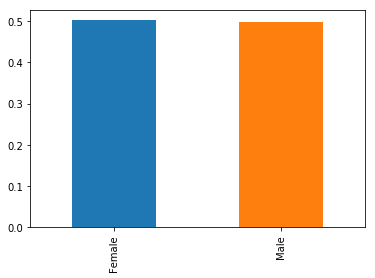

In [212]:
(churn[churn["Churn"] == "Yes"]["gender"].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

It seems like the number of male and female teleco subscribers are somewhat equal!

### Churn Ratio with Respect to Senior Citizen Status

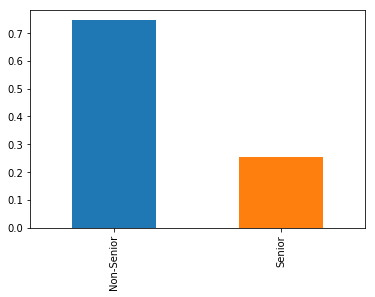

In [213]:
(churn[churn["Churn"] == "Yes"]["SeniorCitizen"].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [214]:
churn1["SeniorCitizen"].value_counts() /len(churn["SeniorCitizen"])

Non-Senior    0.197785
Senior        0.067585
Name: SeniorCitizen, dtype: float64

### Churn Ratio with Respect to Partner Status

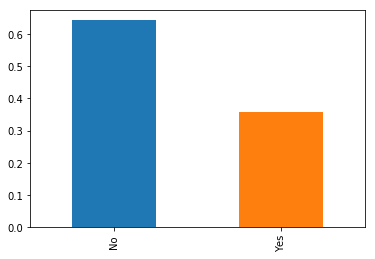

In [215]:
(churn[churn["Churn"] == "Yes"]['Partner'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()


In [216]:
churn1['Partner'].value_counts() / len(churn["Partner"])

No     0.170382
Yes    0.094988
Name: Partner, dtype: float64

### Churn Ratio with Respect to Phone Service

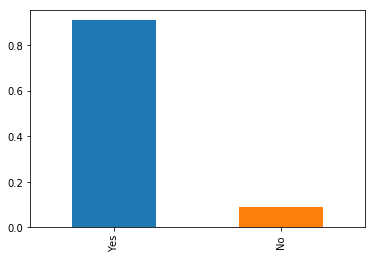

In [217]:
(churn[churn["Churn"] == "Yes"]['PhoneService'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [218]:
churn1[churn1['PhoneService'] == 'Yes']["PhoneService"].count() / len(churn[churn['PhoneService'] == 'Yes'])

0.2670963684955196

In [219]:
churn1[churn1['PhoneService'] == 'No']["PhoneService"].count() / len(churn[churn['PhoneService'] == 'No'])
## there is no significant relation between the phone service and the churn rate

0.24926686217008798

### Churn Ratio with Respect to Multiple Lines

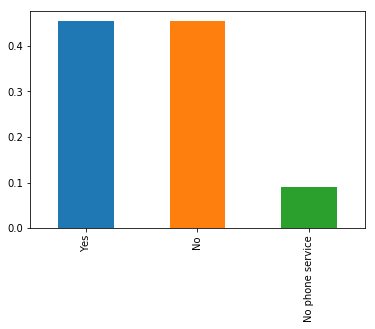

In [220]:
(churn[churn["Churn"] == "Yes"]['MultipleLines'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [221]:
churn1['MultipleLines'].value_counts()

## there is no significant relation between the multiple phone services and the churn rate

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

### Churn Ratio with Respect to Internet Services

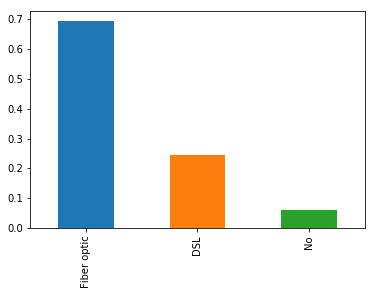

In [222]:
(churn[churn["Churn"] == "Yes"]['InternetService'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [223]:
churn1['InternetService'].value_counts() / churn['InternetService'].value_counts()
# Customer with fiber optic is 2.2 times as likely as to churn compared to the ones having a DSL connection

Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: InternetService, dtype: float64

### Churn Ratio with Respect to Online Security Provision

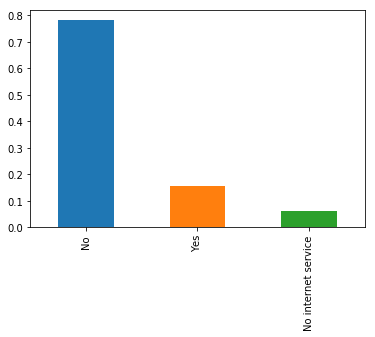

In [224]:
(churn[churn["Churn"] == "Yes"]['OnlineSecurity'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [225]:
churn1['OnlineSecurity'].value_counts() / churn['OnlineSecurity'].value_counts()

No                     0.417667
Yes                    0.146112
No internet service    0.074050
Name: OnlineSecurity, dtype: float64

### Churn Ratio with Respect to Online Backup Provision

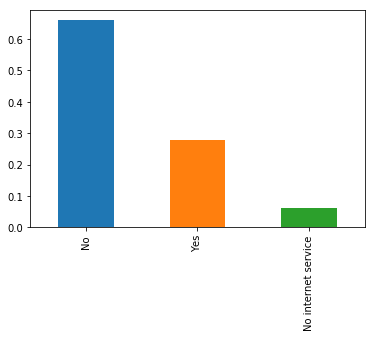

In [226]:

(churn[churn["Churn"] == "Yes"]['OnlineBackup'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [227]:
churn1['OnlineBackup'].value_counts() / churn['OnlineBackup'].value_counts()

No                     0.399288
Yes                    0.215315
No internet service    0.074050
Name: OnlineBackup, dtype: float64

### Churn Ratio with Respect to Device Protection Service

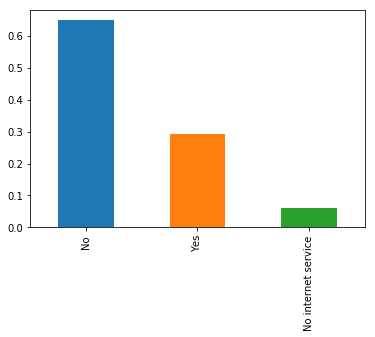

In [228]:
(churn[churn["Churn"] == "Yes"]['DeviceProtection'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [229]:
churn1['DeviceProtection'].value_counts() / churn['DeviceProtection'].value_counts()

No                     0.391276
Yes                    0.225021
No internet service    0.074050
Name: DeviceProtection, dtype: float64

### Churn Ratio with Respect to Tech Support Service

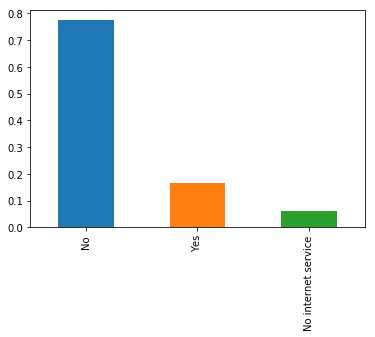

In [230]:
(churn[churn["Churn"] == "Yes"]['TechSupport'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [231]:
churn1['TechSupport'].value_counts() / churn['TechSupport'].value_counts()

No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: TechSupport, dtype: float64

### Churn Ratio with Respect to TV Stream Service

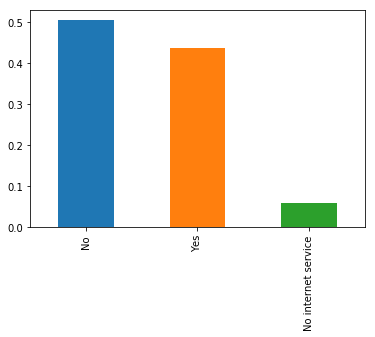

In [232]:
(churn[churn["Churn"] == "Yes"]['StreamingTV'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [233]:
churn1['StreamingTV'].value_counts() / churn['StreamingTV'].value_counts()
## Streaming TV services seem to have no significant effect on churning

No                     0.335231
Yes                    0.300702
No internet service    0.074050
Name: StreamingTV, dtype: float64

### Churn Ratio with Respect to Streaming Movies

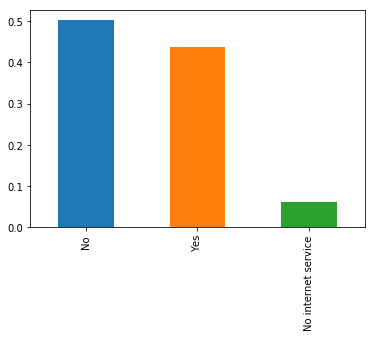

In [234]:

(churn[churn["Churn"] == "Yes"]['StreamingMovies'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [235]:
churn1['StreamingMovies'].value_counts() / churn['StreamingMovies'].value_counts()

No                     0.336804
Yes                    0.299414
No internet service    0.074050
Name: StreamingMovies, dtype: float64

### Churn Ratio with Respect to Type of Contract

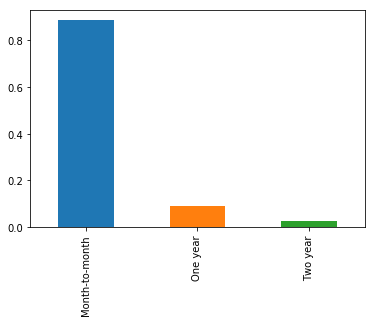

In [236]:
(churn[churn["Churn"] == "Yes"]['Contract'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [237]:
churn1['Contract'].value_counts() / churn['Contract'].value_counts()

Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Contract, dtype: float64

In [238]:
print(0.427097/(0.112695+0.028319))

3.028756010041556


### Churn Ratio with Respect to Billing Type

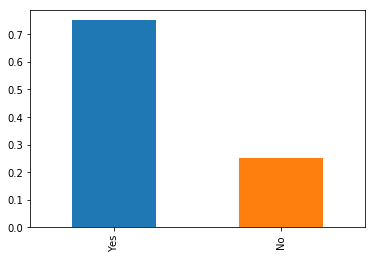

In [239]:
(churn[churn["Churn"] == "Yes"]['PaperlessBilling'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [240]:
churn1['PaperlessBilling'].value_counts() / churn['PaperlessBilling'].value_counts()

Yes    0.335651
No     0.163301
Name: PaperlessBilling, dtype: float64

### Churn Ratio with Respect to Payment Method

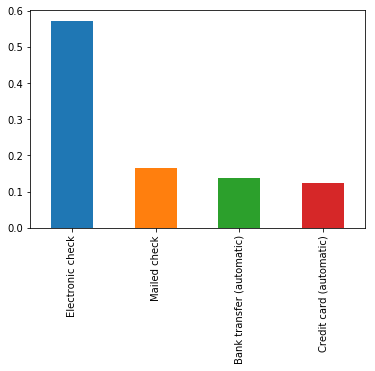

In [241]:
(churn[churn["Churn"] == "Yes"]['PaymentMethod'].value_counts() / len(churn[churn["Churn"] == "Yes"])).plot.bar()

In [242]:
churn1['PaymentMethod'].value_counts() / churn['PaymentMethod'].value_counts()

Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: PaymentMethod, dtype: float64

### Monthly Charges and Churn Rate

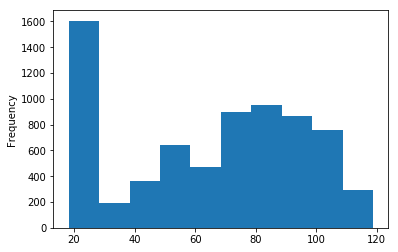

In [243]:
churn['MonthlyCharges'].plot.hist(bins=10)

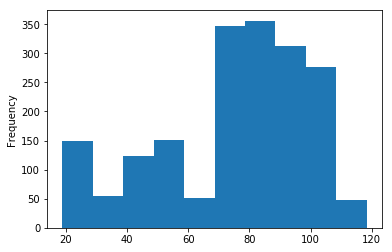

In [244]:
churn1['MonthlyCharges'].plot.hist(bins=10)

In [245]:
len(churn1[churn1["MonthlyCharges"]<70])/len(churn[churn["MonthlyCharges"]<70])

0.1723638470451912

In [246]:
len(churn1[churn1["MonthlyCharges"]>70])/len(churn[churn["MonthlyCharges"]>70])

0.35361428970136755

### It can be observed that with increase in monthly charges the rate of churning also increases